# **Initialising Dataset**

In [1]:
import os
import shutil
from google.colab import drive
import pandas as pd

# Custom function to copy a file with progress
def copy_with_progress(src, dest, buffer_size=1024*1024):
    with open(src, 'rb') as fsrc:
        with open(dest, 'wb') as fdest:
            file_size = os.path.getsize(src)
            print(f"Copying {file_size // (1024 * 1024)} MB...")
            copied = 0
            while True:
                # Read and write in chunks
                data = fsrc.read(buffer_size)
                if not data:
                    break
                fdest.write(data)
                copied += len(data)
                print(f"Progress: {copied * 100 // file_size}%", end='\r')
            print("")

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the http.csv file on your Google Drive
drive_file_path = "/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/df_http_sample.csv"  # Replace with the actual path to your http.csv file

# Define the destination path on your Colab workbook
colab_file_path = "/content/df_http_sample.csv"  # You can change this path if you'd like

# Copy the file from your Google Drive to your Colab workspace
copy_with_progress(drive_file_path, colab_file_path)

# Verify that the file has been copied successfully
if os.path.exists(colab_file_path):
    print(f"✔ Successfully copied http.csv to {colab_file_path}")

    # Load the CSV file into a Pandas DataFrame
    df_http = pd.read_csv(colab_file_path)



Mounted at /content/drive
Copying 736 MB...
Progress: 100%
✔ Successfully copied http.csv to /content/df_http_sample.csv


In [2]:
import glob
import os
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

def get_csv_files_recursive(directory_path, exclude_dirs=[]):
    csv_files = []
    for root, dirs, files in os.walk(directory_path):
        # Exclude specific directories
        dirs[:] = [d for d in dirs if d not in exclude_dirs]

        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))
    return csv_files

directory_path = "/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/"  # Replace with the actual directory path
exclude_dirs = [""]  # Add any directories you want to exclude here
csv_files = get_csv_files_recursive(directory_path, exclude_dirs)


file_path = '/content/drive/MyDrive'
print(os.listdir(file_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Upload', 'ELI', 'Neha', 'Autumn stay ', 'Blippi.png', 'Cake', 'Tape', 'Goa', 'Snakes', 'Share', 'Holiday.xlsx', 'Colab Notebooks', 'device_results.csv']


In [3]:
files = []
names = []
i = 0
print("✔ All CSV files in the directory.")
for csv_file in csv_files:
  if i>6:
    print(f'\t✅ Employees Data - {csv_file.split("/")[-1]}')
  else:
    print(f'\t✅ {csv_file.split("/")[-1]}')
  files.append(csv_file)
  names.append(csv_file.split("/")[-1])
  i+=1
file=pd.read_csv('/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/device.csv')
file.head()

✔ All CSV files in the directory.
	✅ psychometric.csv
	✅ logon.csv
	✅ decoy_file.csv
	✅ device.csv
	✅ file.csv
	✅ Newprocessed_logon.csv
	✅ user.csv
	✅ Employees Data - insiders.csv
	✅ Employees Data - df_combined.csv
	✅ Employees Data - df_http_sample.csv
	✅ Employees Data - 2009-12.csv
	✅ Employees Data - 2010-01.csv
	✅ Employees Data - 2010-02.csv
	✅ Employees Data - 2010-03.csv
	✅ Employees Data - 2010-04.csv
	✅ Employees Data - 2010-05.csv
	✅ Employees Data - 2010-06.csv
	✅ Employees Data - 2010-07.csv
	✅ Employees Data - 2010-08.csv
	✅ Employees Data - 2010-09.csv
	✅ Employees Data - 2010-10.csv
	✅ Employees Data - 2010-11.csv
	✅ Employees Data - 2010-12.csv
	✅ Employees Data - 2011-01.csv
	✅ Employees Data - 2011-02.csv
	✅ Employees Data - 2011-03.csv
	✅ Employees Data - 2011-04.csv
	✅ Employees Data - 2011-05.csv
	✅ Employees Data - df_user.csv
	✅ Employees Data - newprocessed_logon.csv
	✅ Employees Data - df_file_dropped.csv
	✅ Employees Data - df_device_dropped.csv
	✅ Employe

,id,date,user,pc,file_tree,activity
0,{Z2Q8-K3AV28BE-9353JIRT},01/02/2010 07:17:18,SDH2394,PC-5849,R:\;R:\22B5gX4;R:\SDH2394,Connect
1,{C7F1-G7LE60RU-2483DAXS},01/02/2010 07:22:42,JKS2444,PC-6961,R:\;R:\JKS2444,Connect
2,{T9A4-D4RV69OF-1704NINW},01/02/2010 07:31:42,CBA1023,PC-1570,R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...,Connect
3,{S8L0-O6QQ15NL-0636OYNV},01/02/2010 07:33:28,GNT0221,PC-6427,R:\;R:\GNT0221,Connect
4,{U0F1-R1FX27FM-6954TTVU},01/02/2010 07:33:55,JKS2444,PC-6961,NaN,Disconnect


In [4]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading user.csv
directory_path = "/content/drive/MyDrive/Share/r6.2/r6.2/r6.2/LDAP/2009-12"
df_user = pd.read_csv(f"{directory_path}.csv")

In [6]:
print(df_user.head())
print(df_http.head())

              employee_name  user_id                              email  \
0  Nicholas Fletcher Pruitt  NFP2441  Nicholas.Fletcher.Pruitt@dtaa.com   
1     Abraham Dante Rodgers  ADR1517     Abraham.Dante.Rodgers@dtaa.com   
2     Medge Wilma Blackburn  MWB4000     Medge.Wilma.Blackburn@dtaa.com   
3     Meghan Laurel Salazar  MLS2856     Meghan.Laurel.Salazar@dtaa.com   
4          Beau Todd Romero  BTR2026          Beau.Todd.Romero@dtaa.com   

                   role projects  business_unit  \
0               ITAdmin      NaN              1   
1  ProductionLineWorker      NaN              1   
2  ProductionLineWorker      NaN              1   
3  ProductionLineWorker      NaN              1   
4    MechanicalEngineer      NaN              1   

                                  functional_unit       department  \
0                               1 - Adminstration     5 - Security   
1                    5 - Manufacturing_Commercial     3 - Assembly   
2                    6 - Manufac

In [7]:
# Print the shape and columns user
print(f"Shape of 2009-12.csv:\t\t {df_user.shape}")
print(f"Columns of 2009-12.csv:\t {df_user.columns}")
# Print the shape and columns http
print(f"Shape of http.csv:\t\t {df_http.shape}")
print(f"Columns of http.csv:\t {df_http.columns}")

Shape of 2009-12.csv:		 (4000, 10)
Columns of 2009-12.csv:	 Index(['employee_name', 'user_id', 'email', 'role', 'projects',
       'business_unit', 'functional_unit', 'department', 'team', 'supervisor'],
      dtype='object')
Shape of http.csv:		 (1000000, 7)
Columns of http.csv:	 Index(['id', 'date', 'user', 'pc', 'url', 'activity', 'content'], dtype='object')


# **Data Preprocessing**

In [8]:
# Rename the 'user_id' column to 'user'
df_user.rename(columns={'user_id': 'user'}, inplace=True)

In [9]:
print("Unique users in df_http:", df_http['user'].nunique())
print("Unique users in df_user:", df_user['user'].nunique())

Unique users in df_http: 4000
Unique users in df_user: 4000


In [10]:
df_http_reduced = df_http[['user', 'url', 'activity']]
df_user_reduced = df_user[['user','role']]
print(df_user_reduced.head())
print(df_http_reduced.head())

      user                  role
0  NFP2441               ITAdmin
1  ADR1517  ProductionLineWorker
2  MWB4000  ProductionLineWorker
3  MLS2856  ProductionLineWorker
4  BTR2026    MechanicalEngineer
      user                                                url   activity
0  ACM2278  http://discovercard.com/Brian_Eaton/eaton/Cres...  WWW Visit
1  ACM2278  http://people.com/Coenwulf_of_Mercia/wulfred/f...  WWW Visit
2  ACM2278  http://foodnetwork.com/C_R_M_F_Cruttwell/waugh...  WWW Visit
3  ACM2278  http://lowes.com/Layla/allmans/Jngpuzra2111045...  WWW Visit
4  ACM2278  http://topix.com/Harmon_Killebrew/rbis/Ntnevph...  WWW Visit


In [11]:
df_merged_http_user = pd.merge(df_user_reduced, df_http_reduced, left_on='user', right_on='user', how='inner')

In [12]:
print(df_merged_http_user.head())

      user     role                                                url  \
0  NFP2441  ITAdmin  http://bankofamerica.com/Geology_of_the_Zion_a...   
1  NFP2441  ITAdmin  http://constantcontact.com/Jack_Sheppard/blues...   
2  NFP2441  ITAdmin  http://bankofamerica.com/Geology_of_the_Zion_a...   
3  NFP2441  ITAdmin  http://addthis.com/Tarbosaurus/alioramus/1952_...   
4  NFP2441  ITAdmin  http://vistaprint.com/Stan_Musial/donora/Gubzn...   

    activity  
0  WWW Visit  
1  WWW Visit  
2  WWW Visit  
3  WWW Visit  
4  WWW Visit  


In [17]:
# List of sensitive keywords to check
sensitive_keywords = ['wikileaks', 'julian', 'assange', 'jobsearch', 'linkedin', 'indeed.com', 'keylogger', 'dropbox']

# Initialize a dictionary to store the counts
keyword_counts = {}

# Check for each keyword in the URL and content columns
for keyword in sensitive_keywords:
    keyword_count = df_merged_http_user['url'].str.contains(keyword, case=False).sum()
    keyword_counts[keyword] = keyword_count

# Display the counts
print("Number of instances containing sensitive keywords:")
for keyword, count in keyword_counts.items():
    print(f"{keyword}: {count}")

# Add binary flags for each sensitive keyword
for keyword in sensitive_keywords:
    df_merged_http_user[f"{keyword}_flag"] = df_merged_http_user['url'].str.contains(keyword, case=False).astype(int)

# Show the first few rows to confirm the new features
df_merged_http_user.head()

Number of instances containing sensitive keywords:
wikileaks: 7
julian: 7
assange: 7
jobsearch: 0
linkedin: 2501
indeed.com: 2138
keylogger: 2
dropbox: 5582


,user,role,url,activity,wikileaks_flag,julian_flag,assange_flag,jobsearch_flag,linkedin_flag,indeed.com_flag,keylogger_flag,dropbox_flag
0,NFP2441,ITAdmin,http://bankofamerica.com/Geology_of_the_Zion_a...,WWW Visit,0,0,0,0,0,0,0,0
1,NFP2441,ITAdmin,http://constantcontact.com/Jack_Sheppard/blues...,WWW Visit,0,0,0,0,0,0,0,0
2,NFP2441,ITAdmin,http://bankofamerica.com/Geology_of_the_Zion_a...,WWW Visit,0,0,0,0,0,0,0,0
3,NFP2441,ITAdmin,http://addthis.com/Tarbosaurus/alioramus/1952_...,WWW Visit,0,0,0,0,0,0,0,0
4,NFP2441,ITAdmin,http://vistaprint.com/Stan_Musial/donora/Gubzn...,WWW Visit,0,0,0,0,0,0,0,0


In [18]:
# Calculate the number of unique URLs accessed per session for each user
df_merged_http_user['unique_urls'] = df_merged_http_user.groupby(['user'])['url'].transform('nunique')

# Preview the new features
print(df_merged_http_user[['user', 'unique_urls']].head())

      user  unique_urls
0  NFP2441           60
1  NFP2441           60
2  NFP2441           60
3  NFP2441           60
4  NFP2441           60


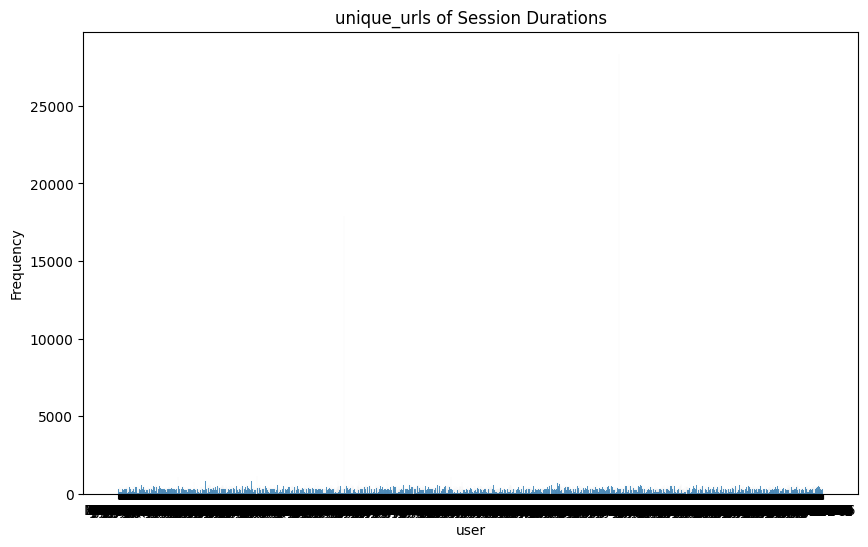

In [19]:
# Number of Unique URLs Distribution

plt.figure(figsize=(10,6))
sns.histplot(df_merged_http_user['user'].dropna(), kde=False, bins=100)
plt.title('unique_urls of Session Durations')
plt.xlabel('user')
plt.ylabel('Frequency')
plt.show()


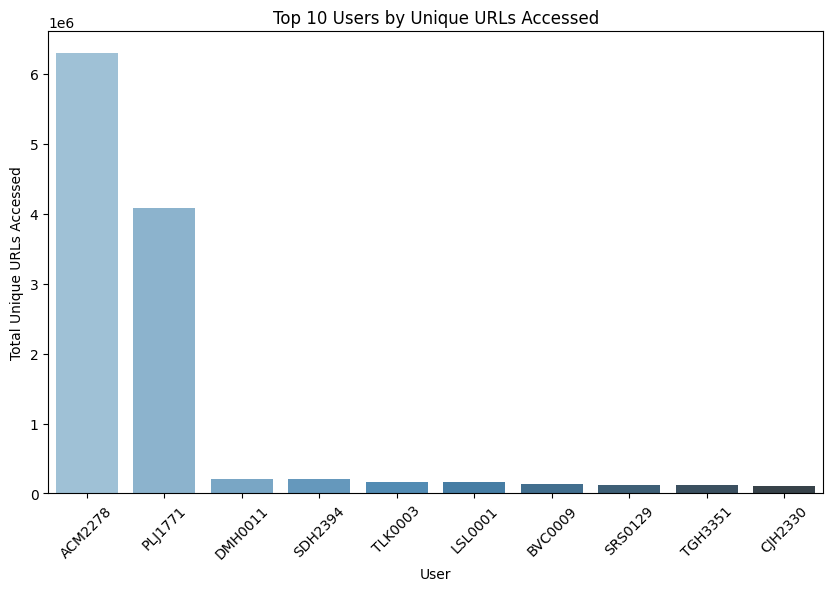

In [ ]:
# Top 10 Users by Unique URLs Accessed
top_users_urls = df_merged_http_user.groupby('user')['unique_urls'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_users_urls.index, y=top_users_urls.values, palette="Blues_d")
plt.title('Top 10 Users by Unique URLs Accessed')
plt.xlabel('User')
plt.ylabel('Total Unique URLs Accessed')
plt.xticks(rotation=45)
plt.show()


In [20]:
print(df_merged_http_user.head())

      user     role                                                url  \
0  NFP2441  ITAdmin  http://bankofamerica.com/Geology_of_the_Zion_a...   
1  NFP2441  ITAdmin  http://constantcontact.com/Jack_Sheppard/blues...   
2  NFP2441  ITAdmin  http://bankofamerica.com/Geology_of_the_Zion_a...   
3  NFP2441  ITAdmin  http://addthis.com/Tarbosaurus/alioramus/1952_...   
4  NFP2441  ITAdmin  http://vistaprint.com/Stan_Musial/donora/Gubzn...   

    activity  wikileaks_flag  julian_flag  assange_flag  jobsearch_flag  \
0  WWW Visit               0            0             0               0   
1  WWW Visit               0            0             0               0   
2  WWW Visit               0            0             0               0   
3  WWW Visit               0            0             0               0   
4  WWW Visit               0            0             0               0   

   linkedin_flag  indeed.com_flag  keylogger_flag  dropbox_flag  unique_urls  
0              0         

In [21]:
# Drop irrelevant columns
columns_to_drop = ['user', 'role', 'url', 'activity']
df_merged_http_user_filtered = df_merged_http_user.drop(columns=columns_to_drop)

# Show the DataFrame after dropping irrelevant columns
df_merged_http_user_filtered

,wikileaks_flag,julian_flag,assange_flag,jobsearch_flag,linkedin_flag,indeed.com_flag,keylogger_flag,dropbox_flag,unique_urls
0,0,0,0,0,0,0,0,0,60
1,0,0,0,0,0,0,0,0,60
2,0,0,0,0,0,0,0,0,60
3,0,0,0,0,0,0,0,0,60
4,0,0,0,0,0,0,0,0,60
...,...,...,...,...,...,...,...,...,...
999995,0,0,0,0,0,0,0,0,69
999996,0,0,0,0,0,0,0,0,69
999997,0,0,0,0,0,0,0,0,69
999998,0,0,0,0,0,0,0,0,69


# **Feature Engineering for Scenario 1**

In [22]:
# Display the first few rows of the dataframe to check if the flagging worked
print(df_merged_http_user_filtered.head())

   wikileaks_flag  julian_flag  assange_flag  jobsearch_flag  linkedin_flag  \
0               0            0             0               0              0   
1               0            0             0               0              0   
2               0            0             0               0              0   
3               0            0             0               0              0   
4               0            0             0               0              0   

   indeed.com_flag  keylogger_flag  dropbox_flag  unique_urls  
0                0               0             0           60  
1                0               0             0           60  
2                0               0             0           60  
3                0               0             0           60  
4                0               0             0           60  


In [23]:
print(f"Shape of http.csv:\t\t {df_merged_http_user_filtered.shape}")
print(f"Columns of http.csv:\t {df_merged_http_user_filtered.columns}")

Shape of http.csv:		 (1000000, 9)
Columns of http.csv:	 Index(['wikileaks_flag', 'julian_flag', 'assange_flag', 'jobsearch_flag',
       'linkedin_flag', 'indeed.com_flag', 'keylogger_flag', 'dropbox_flag',
       'unique_urls'],
      dtype='object')


# **Feature Engineering for Scenario 4**

In [24]:
# Identify Dropbox Activity
df_merged_http_user_filtered['Dropbox_url'] = df_merged_http_user['url'].apply(lambda x: 'dropbox' in str(x).lower())


In [25]:
# Converting boolean-like strings to integers if needed
df_merged_http_user_filtered['Dropbox_url'] = df_merged_http_user_filtered['Dropbox_url'].astype(int)

# **Training data**

In [26]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical features
features = ['wikileaks_flag', 'julian_flag', 'assange_flag', 'jobsearch_flag',
       'linkedin_flag', 'indeed.com_flag', 'keylogger_flag', 'dropbox_flag',
       'unique_urls']  # add other features if you have more
X = df_merged_http_user_filtered[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale
features_to_scale = ['wikileaks_flag', 'julian_flag','assange_flag', 'jobsearch_flag', 'linkedin_flag', 'indeed.com_flag','keylogger_flag', 'dropbox_flag']

# Fit and transform the features
df_merged_http_user_filtered[features] = scaler.fit_transform(df_merged_http_user_filtered[features])


In [34]:
# Show the first few rows to confirm scaling
print(df_merged_http_user_filtered.head())

   wikileaks_flag  julian_flag  assange_flag  jobsearch_flag  linkedin_flag  \
0       -0.002646    -0.002646     -0.002646             0.0      -0.050073   
1       -0.002646    -0.002646     -0.002646             0.0      -0.050073   
2       -0.002646    -0.002646     -0.002646             0.0      -0.050073   
3       -0.002646    -0.002646     -0.002646             0.0      -0.050073   
4       -0.002646    -0.002646     -0.002646             0.0      -0.050073   

   indeed.com_flag  keylogger_flag  dropbox_flag  unique_urls  Dropbox_url  \
0        -0.046288       -0.001414     -0.074922    -0.578141            0   
1        -0.046288       -0.001414     -0.074922    -0.578141            0   
2        -0.046288       -0.001414     -0.074922    -0.578141            0   
3        -0.046288       -0.001414     -0.074922    -0.578141            0   
4        -0.046288       -0.001414     -0.074922    -0.578141            0   

   anomaly_LOF  
0            1  
1            1  
2    

In [29]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Your scaled and filtered dataset
X = df_merged_http_user_filtered


In [30]:
# Train Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_labels = lof.fit_predict(X)

df_merged_http_user_filtered['anomaly_LOF'] = lof_labels


In [33]:
# Create flags for users based on Local Outlier Factor
users_LOF = df_merged_http_user[df_merged_http_user_filtered['anomaly_LOF'] == -1]['user'].unique()

# Print flagged users
print("Flagged users based on Local Outlier Factor:", users_LOF)

Flagged users based on Local Outlier Factor: ['SEM1983' 'CLR1239' 'JBO2839' 'IKA2925' 'ARF0575' 'WSC2981' 'GEH0420'
 'FJO1828' 'CRT2273' 'WDS2197' 'SHB2106' 'IBW1779' 'NDH3827' 'HVS1143'
 'JRK2707' 'CEC1352' 'ALS3440' 'CNT0946' 'WNC0874' 'HWV1621' 'GMF1213'
 'KAH2398' 'OKF2007' 'MBC0803' 'CHB1062' 'ESS3318' 'FGN0375' 'THM1021'
 'TGC1489' 'FQG2974' 'ITK2781' 'KKD1980' 'APM0190' 'SAB3860' 'CJC2371'
 'PPP1295' 'CET3786' 'GBC0907' 'WBH1861' 'KIG1594' 'BDV2474' 'ARB3934'
 'KFB2257' 'GNB3337' 'DMH0011' 'DBL2605' 'MAK1309' 'KRN2211' 'JVZ3437'
 'RKW1754' 'TVC2918' 'EHV1237' 'AME1490' 'XAL2816' 'FTF1665' 'FTS0246'
 'SZG0325' 'MJA2380' 'PSD1409' 'OJG3395' 'BXG1340' 'ERA0725' 'CPC0724'
 'BYF3784' 'WMM0873' 'WMR2723' 'IFC0958' 'ACH0008' 'DJB1236' 'OGD0015'
 'AXL0479' 'RCF0054' 'MTM1434' 'ISR0021' 'JAY3851' 'AOP1542' 'JOW0688'
 'CBH0413' 'COW3840' 'IKC1205' 'SBW3023' 'AIH2535' 'IMN1730' 'DGN3358'
 'SDN2932' 'GJM0838' 'ENM2269' 'MIC2325' 'NBL0182' 'NKD3073' 'JGH0728'
 'TGA2006' 'JCH2505' 'CTH0915' '

In [35]:
# Train Isolation Forest
iforest = IsolationForest(n_estimators=100, contamination=0.1)
iforest_labels = iforest.fit_predict(X)

df_merged_http_user_filtered['anomaly_iForest'] = iforest_labels

In [37]:
# Create flags for users based on Local Outlier Factor
users_iForest = df_merged_http_user[df_merged_http_user_filtered['anomaly_iForest'] == -1]['user'].unique()

# Print flagged users
print("Flagged users based on Isolation Forest:", users_iForest)

Flagged users based on Isolation Forest: ['NFP2441' 'ADR1517' 'MWB4000' ... 'ZOM0746' 'GJT1292' 'BLD2227']


In [38]:
# Train One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', nu=0.1)
ocsvm_labels = ocsvm.fit_predict(X)

# Adding the labels to the DataFrame
df_merged_http_user_filtered['anomaly_OCSVM'] = ocsvm_labels

# Show the first few rows to confirm the new anomaly labels
print(df_merged_http_user_filtered.head())

   wikileaks_flag  julian_flag  assange_flag  jobsearch_flag  linkedin_flag  \
0       -0.002646    -0.002646     -0.002646             0.0      -0.050073   
1       -0.002646    -0.002646     -0.002646             0.0      -0.050073   
2       -0.002646    -0.002646     -0.002646             0.0      -0.050073   
3       -0.002646    -0.002646     -0.002646             0.0      -0.050073   
4       -0.002646    -0.002646     -0.002646             0.0      -0.050073   

   indeed.com_flag  keylogger_flag  dropbox_flag  unique_urls  Dropbox_url  \
0        -0.046288       -0.001414     -0.074922    -0.578141            0   
1        -0.046288       -0.001414     -0.074922    -0.578141            0   
2        -0.046288       -0.001414     -0.074922    -0.578141            0   
3        -0.046288       -0.001414     -0.074922    -0.578141            0   
4        -0.046288       -0.001414     -0.074922    -0.578141            0   

   anomaly_LOF  anomaly_iForest  anomaly_OCSVM  
0      

In [41]:
# Create flags for users based on One-Class SVM
users_OCSVM = df_merged_http_user[df_merged_http_user_filtered['anomaly_OCSVM'] == -1]['user'].unique()

# Print flagged users
print("Flagged users based on One-Class SVM:", users_OCSVM)


Flagged users based on One-Class SVM: ['NFP2441' 'ADR1517' 'MWB4000' ... 'GJT1292' 'BLD2227' 'JLF3219']


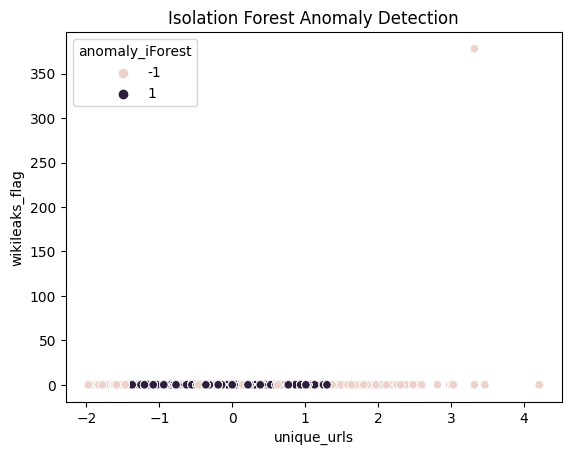

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Isolation Forest results
sns.scatterplot(data=df_merged_http_user_filtered, x='unique_urls', y='wikileaks_flag', hue='anomaly_iForest')
plt.title('Isolation Forest Anomaly Detection')
plt.show()



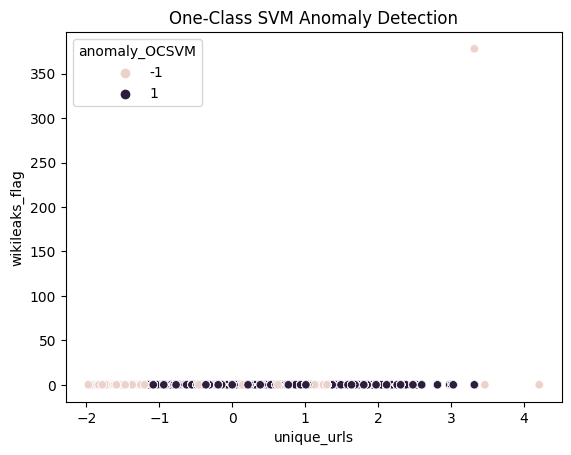

In [43]:
# Scatter plot for One-Class SVM results
sns.scatterplot(data=df_merged_http_user_filtered, x='unique_urls', y='wikileaks_flag', hue='anomaly_OCSVM')
plt.title('One-Class SVM Anomaly Detection')
plt.show()




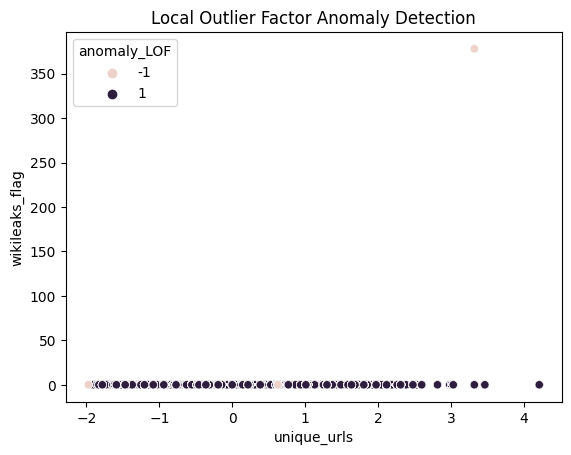

In [44]:
# Scatter plot for Local Outlier Factor results
sns.scatterplot(data=df_merged_http_user_filtered, x='unique_urls', y='wikileaks_flag', hue='anomaly_LOF')
plt.title('Local Outlier Factor Anomaly Detection')
plt.show()

In [46]:
# Create flags for users based on Isolation Forest
users_iForest = df_merged_http_user[df_merged_http_user_filtered['anomaly_iForest'] == -1]['user'].unique()

# Create flags for users based on One-Class SVM
users_OCSVM = df_merged_http_user[df_merged_http_user_filtered['anomaly_OCSVM'] == -1]['user'].unique()

# Create flags for users based on Local Outlier Factor
users_LOF = df_merged_http_user[df_merged_http_user_filtered['anomaly_LOF'] == -1]['user'].unique()

# Print flagged users
print("Flagged users based on Isolation Forest:", users_iForest)
print("Flagged users based on One-Class SVM:", users_OCSVM)
print("Flagged users based on Local Outlier Factor:", users_LOF)


Flagged users based on Isolation Forest: ['NFP2441' 'ADR1517' 'MWB4000' ... 'ZOM0746' 'GJT1292' 'BLD2227']
Flagged users based on One-Class SVM: ['NFP2441' 'ADR1517' 'MWB4000' ... 'GJT1292' 'BLD2227' 'JLF3219']
Flagged users based on Local Outlier Factor: ['SEM1983' 'CLR1239' 'JBO2839' 'IKA2925' 'ARF0575' 'WSC2981' 'GEH0420'
 'FJO1828' 'CRT2273' 'WDS2197' 'SHB2106' 'IBW1779' 'NDH3827' 'HVS1143'
 'JRK2707' 'CEC1352' 'ALS3440' 'CNT0946' 'WNC0874' 'HWV1621' 'GMF1213'
 'KAH2398' 'OKF2007' 'MBC0803' 'CHB1062' 'ESS3318' 'FGN0375' 'THM1021'
 'TGC1489' 'FQG2974' 'ITK2781' 'KKD1980' 'APM0190' 'SAB3860' 'CJC2371'
 'PPP1295' 'CET3786' 'GBC0907' 'WBH1861' 'KIG1594' 'BDV2474' 'ARB3934'
 'KFB2257' 'GNB3337' 'DMH0011' 'DBL2605' 'MAK1309' 'KRN2211' 'JVZ3437'
 'RKW1754' 'TVC2918' 'EHV1237' 'AME1490' 'XAL2816' 'FTF1665' 'FTS0246'
 'SZG0325' 'MJA2380' 'PSD1409' 'OJG3395' 'BXG1340' 'ERA0725' 'CPC0724'
 'BYF3784' 'WMM0873' 'WMR2723' 'IFC0958' 'ACH0008' 'DJB1236' 'OGD0015'
 'AXL0479' 'RCF0054' 'MTM1434' 'IS

In [ ]:
from sklearn.ensemble import IsolationForest

# Select the features for training
features_for_training = ['unique_urls_zscore', 'sensitive_url_flag_zscore']
X_train = df_merged_http_user[features_for_training]

# Initialize and train the model
clf = IsolationForest(contamination=0.01)  # contamination is the proportion of outliers in the dataset
clf.fit(X_train)

# Predict the anomalies in the data
df_merged_http_user['anomaly_iForest'] = clf.predict(X_train)


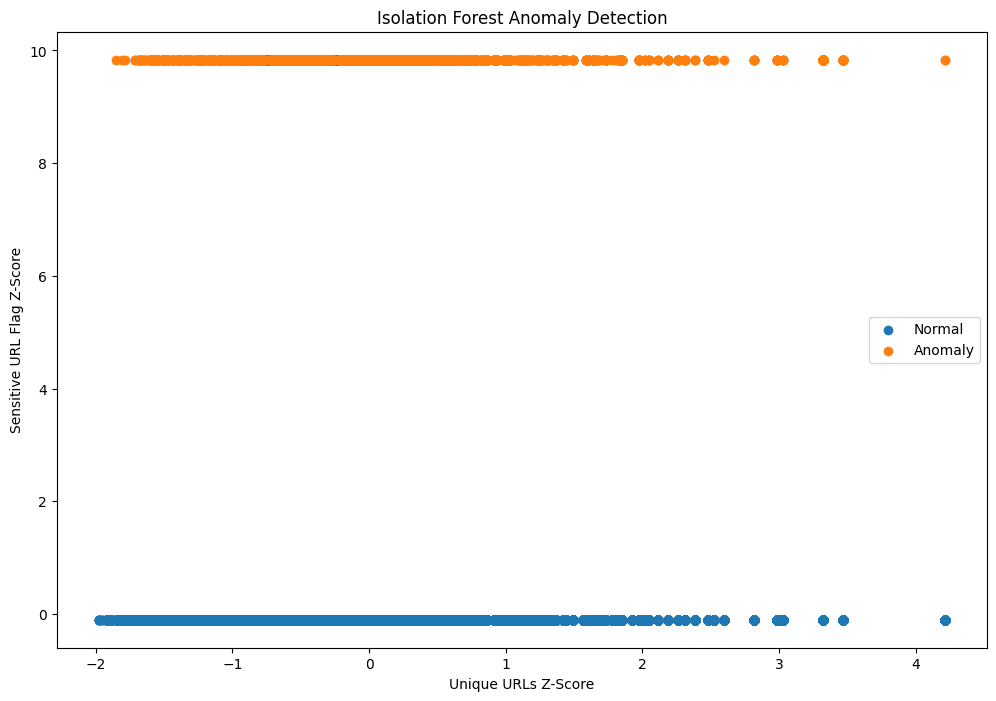

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(df_merged_http_user.loc[df_merged_http_user['anomaly_iForest'] == 1, 'unique_urls_zscore'],
            df_merged_http_user.loc[df_merged_http_user['anomaly_iForest'] == 1, 'sensitive_url_flag_zscore'],
            label='Normal')
plt.scatter(df_merged_http_user.loc[df_merged_http_user['anomaly_iForest'] == -1, 'unique_urls_zscore'],
            df_merged_http_user.loc[df_merged_http_user['anomaly_iForest'] == -1, 'sensitive_url_flag_zscore'],
            label='Anomaly')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Unique URLs Z-Score')
plt.ylabel('Sensitive URL Flag Z-Score')
plt.legend()
plt.show()


In [ ]:
anomalies = df_merged_http_user[df_merged_http_user['anomaly_iForest'] == -1]
print(anomalies.head())


         user               role  \
301   NFP2441            ITAdmin   
314   NFP2441            ITAdmin   
988   ZCT1009            Manager   
1129  SEM1983  MaterialsEngineer   
1163  SEM1983  MaterialsEngineer   

                                                    url   activity  \
301   https://dropbox.com/Lockdown_2008/lockdown/Bpr...  WWW Visit   
314   https://dropbox.com/Lockdown_2008/lockdown/Bpr...  WWW Visit   
988   http://linkedin.com/PybfvatCebwrpgwbofrnepu147...  WWW Visit   
1129  http://linkedin.com/Silverchair/frogstomp/1910...  WWW Visit   
1163  http://linkedin.com/Silverchair/frogstomp/1910...  WWW Visit   

      unique_urls  sensitive_url_flag  unique_urls_zscore  \
301     -0.578141            9.836245           -0.578141   
314     -0.578141            9.836245           -0.578141   
988      0.264071            9.836245            0.264071   
1129    -0.842836            9.836245           -0.842836   
1163    -0.842836            9.836245           -0.842836

In [ ]:
# Filter the data to only include users identified as anomalies by iForest
anomalous_users = df_merged_http_user[df_merged_http_user['anomaly_iForest'] == -1]['user'].unique()

# Initialize empty lists to collect users of interest
dropbox_users = []
wikileaks_users = []
jobsearch_users = []
assange_users = []
linkedin_users = []

# Investigate the activities of these anomalous users
for user in anomalous_users:
    user_data = df_merged_http_user[df_merged_http_user['user'] == user]

    # Check for Dropbox access
    if user_data['url'].str.contains('dropbox').any():
        dropbox_users.append(user)

    # Check for Wikileaks access
    if user_data['url'].str.contains('wikileaks').any():
        wikileaks_users.append(user)

    # Check for Jobsearch-related activity
    if user_data['url'].str.contains('jobsearch').any():
        jobsearch_users.append(user)

    # Check for Assange-related activity
    if user_data['url'].str.contains('assange').any():
        assange_users.append(user)

    # Check for Linked-related activity
    if user_data['url'].str.contains('linkedin').any():
        linkedin_users.append(user)

# Print the results
print(f"Users who have accessed Dropbox: {dropbox_users}")
print(f"Users who have accessed Wikileaks: {wikileaks_users}")
print(f"Users who have shown Jobsearch-related activity: {jobsearch_users}")
print(f"Users who have shown Assange-related activity: {assange_users}")
print(f"Users who have shown Assange-related activity: {linkedin_users}")


Users who have accessed Dropbox: ['NFP2441', 'CLR1239', 'GKK2422', 'MYB3817', 'JTC0941', 'KMB3003', 'MAS3218', 'MJG2304', 'LCB2041', 'ZJB0552', 'AKP3573', 'JRA0522', 'RLS1738', 'GEH0420', 'OAS0991', 'CRT2273', 'ACH1910', 'TJM0328', 'PCT1234', 'AVC2328', 'NJM0440', 'IBW1779', 'BVB1673', 'NDH3827', 'SLM1119', 'JRR0829', 'BMF2337', 'JRK2707', 'KDB0266', 'ALS3440', 'DHG0962', 'TLW2668', 'WNC0874', 'MNC0433', 'IWG0058', 'HWV1621', 'CGT3148', 'ELB0033', 'WEC3721', 'WRM0515', 'MFL0355', 'JNR2260', 'AAH0721', 'CCW2381', 'ANM0564', 'SWR3808', 'AEH0187', 'DAM0096', 'RAI1483', 'SIS3576', 'QJF3038', 'CKB0169', 'SJW3131', 'VCV1353', 'HJW2646', 'CAO3117', 'DEN0236', 'FHA3387', 'DRB0202', 'DMW2128', 'OKF2007', 'TAW2664', 'MBC0803', 'CHB1062', 'TWH1178', 'SGV2780', 'MBH3427', 'WNR0661', 'ESS3318', 'LFC2015', 'JVS2308', 'DRM2927', 'GKG3414', 'FGN0375', 'XKR2059', 'SDW0370', 'HTC1750', 'RCH3740', 'WNR0091', 'JMG3365', 'FQG2974', 'ITK2781', 'JUH3378', 'KKD1980', 'DRJ0794', 'KVD2453', 'KSV2881', 'VQS3246'

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Initialize the feature set
features_for_training = ['unique_urls_zscore', 'sensitive_url_flag_zscore']
X_train = df_merged_http_user[features_for_training]


In [ ]:

# ------------------ One-Class SVM (OCSVM) ------------------
print("Training OCSVM...")
ocsvm_clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)
ocsvm_clf.fit(X_train)
df_merged_http_user['anomaly_OCSVM'] = ocsvm_clf.predict(X_train)

# Display the results
print("Anomalies identified by each model:")
print("OCSVM Anomalies Count:", df_merged_http_user['anomaly_OCSVM'].value_counts())


Training OCSVM...
Anomalies identified by each model:
OCSVM Anomalies Count:  1    991695
-1      8305
Name: anomaly_OCSVM, dtype: int64


In [ ]:
# ------------------ Local Outlier Factor (LOF) ------------------
print("Training LOF...")
lof_clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df_merged_http_user['anomaly_LOF'] = lof_clf.fit_predict(X_train)

print("LOF Anomalies Count:", df_merged_http_user['anomaly_LOF'].value_counts())




Training LOF...
LOF Anomalies Count:  1    999639
-1       361
Name: anomaly_LOF, dtype: int64


In [ ]:
# Users flagged by iForest
anomalies_iForest = df_merged_http_user[df_merged_http_user['anomaly_iForest'] == -1]

# Users flagged by OCSVM
anomalies_OCSVM = df_merged_http_user[df_merged_http_user['anomaly_OCSVM'] == -1]

# Users flagged by LOF
anomalies_LOF = df_merged_http_user[df_merged_http_user['anomaly_LOF'] == -1]

# Combine all unique anomalous users
unique_anomalous_users = set(anomalies_iForest['user']).union(set(anomalies_OCSVM['user'])).union(set(anomalies_LOF['user']))


In [ ]:
# Users flagged by all models
common_anomalies = set(anomalies_iForest['user']).intersection(set(anomalies_OCSVM['user'])).intersection(set(anomalies_LOF['user']))


In [ ]:
print(common_anomalies)

{'KBC0578', 'ILK3668', 'WOL3226', 'AYA3962', 'IBP2990', 'SRS0129', 'IBV1578', 'RIB1582', 'SAM3855', 'MSR2850', 'IAS0857', 'NRK3448', 'MSW0973', 'MCN0985', 'KFB2257', 'AIH2535', 'KNW1321', 'RJF3299', 'KNM0423', 'FPV3755', 'CGT3148', 'PJC1252', 'TGA2006', 'ATC0218', 'LCR1537', 'LMH2801', 'DMH0011', 'JFB0961', 'BDP3912', 'LSL0001', 'CIY1654', 'LWB2851', 'KNS2828', 'SAC0374', 'GMF1213', 'JSM3334', 'TGC1489', 'BXG1340', 'RSR2681', 'RRM2175', 'LAF2213', 'HWV1621', 'FKR3316', 'DAH3331', 'BGA0892', 'SDH2394', 'JAM2248', 'SER0621', 'ODB1853', 'ACM3964', 'JNM0905', 'NMW0896', 'ITK2781', 'RDB1693', 'RRH3057', 'WDS2197', 'WBE0967', 'WAS2214', 'MMC0261', 'RCM3458', 'TGH3351', 'KKP2284', 'JAA0897', 'AAS2987', 'MIA0939', 'BJH3402', 'ATH0225', 'SVM3947', 'KSM1518', 'RJS3256', 'BVC0009', 'VMW1500', 'DRF1498', 'HID1899', 'DIP3310', 'PDM0304', 'SLD1639', 'KDT3773', 'CAP2283', 'SSA0346', 'UKC0543', 'LBG0407', 'DER2162', 'MDH3639', 'LIG2813', 'SHH0970', 'FDH0299', 'CMM1068', 'BCM3794', 'NVL2180', 'HHS3357'

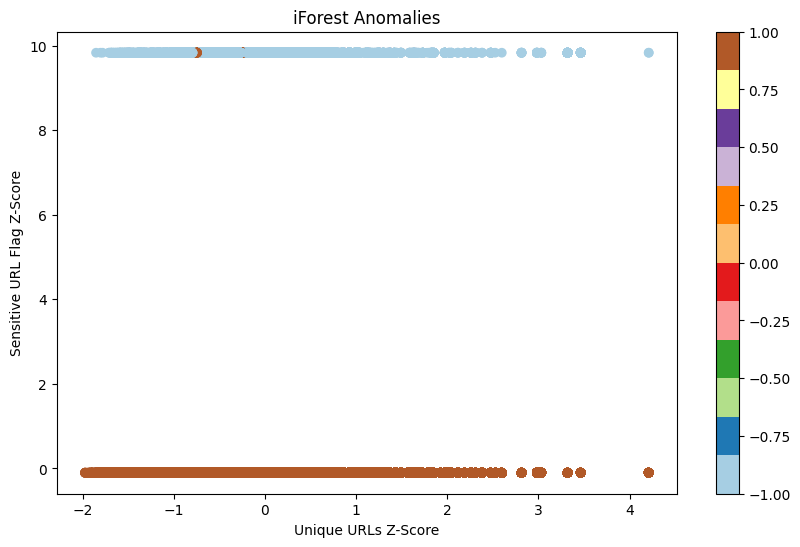

In [ ]:
import matplotlib.pyplot as plt

# iForest
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_http_user['unique_urls_zscore'], df_merged_http_user['sensitive_url_flag_zscore'], c=df_merged_http_user['anomaly_iForest'], cmap='Paired')
plt.title('iForest Anomalies')
plt.xlabel('Unique URLs Z-Score')
plt.ylabel('Sensitive URL Flag Z-Score')
plt.colorbar()
plt.show()


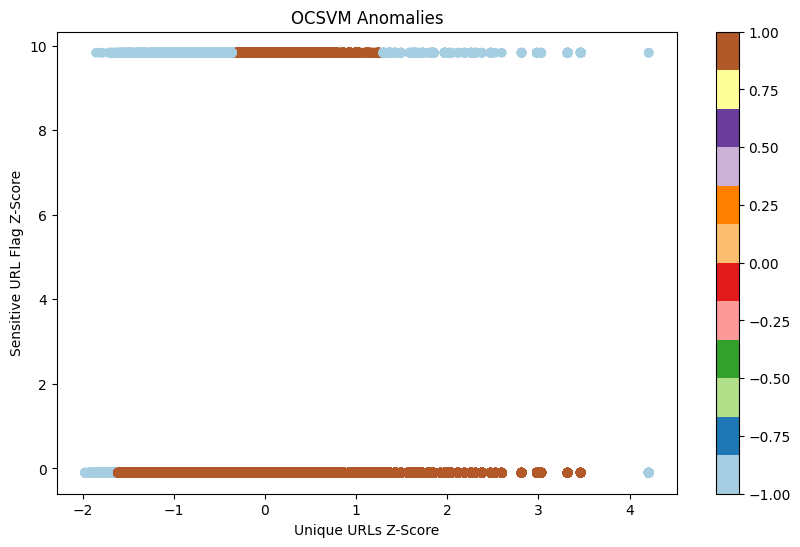

In [ ]:
# OCSVM
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_http_user['unique_urls_zscore'], df_merged_http_user['sensitive_url_flag_zscore'], c=df_merged_http_user['anomaly_OCSVM'], cmap='Paired')
plt.title('OCSVM Anomalies')
plt.xlabel('Unique URLs Z-Score')
plt.ylabel('Sensitive URL Flag Z-Score')
plt.colorbar()
plt.show()


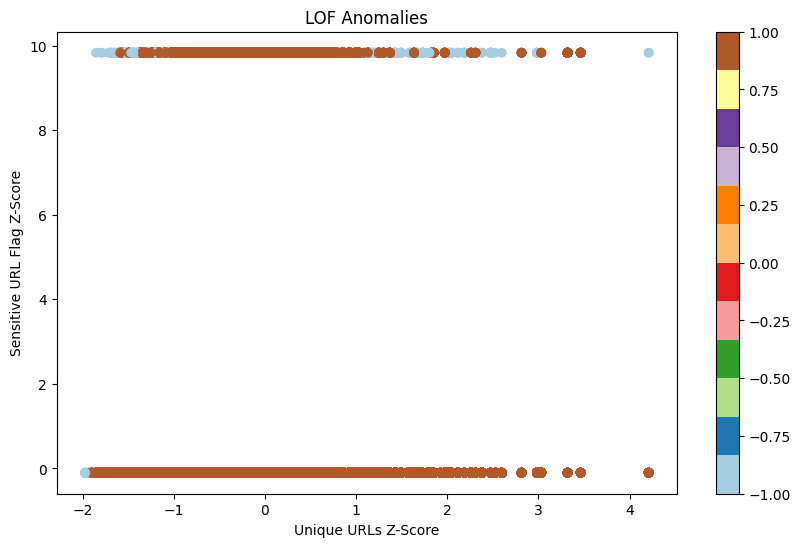

In [ ]:
# LOF
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_http_user['unique_urls_zscore'], df_merged_http_user['sensitive_url_flag_zscore'], c=df_merged_http_user['anomaly_LOF'], cmap='Paired')
plt.title('LOF Anomalies')
plt.xlabel('Unique URLs Z-Score')
plt.ylabel('Sensitive URL Flag Z-Score')
plt.colorbar()
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA and the X vector for dimensionality reduction
pca = PCA(n_components=2)

# Apply PCA
X_pca = pca.fit_transform(X_train)  # X_train contains your scaled features


In [ ]:
df_merged_http_user['PCA1'] = X_pca[:, 0]
df_merged_http_user['PCA2'] = X_pca[:, 1]


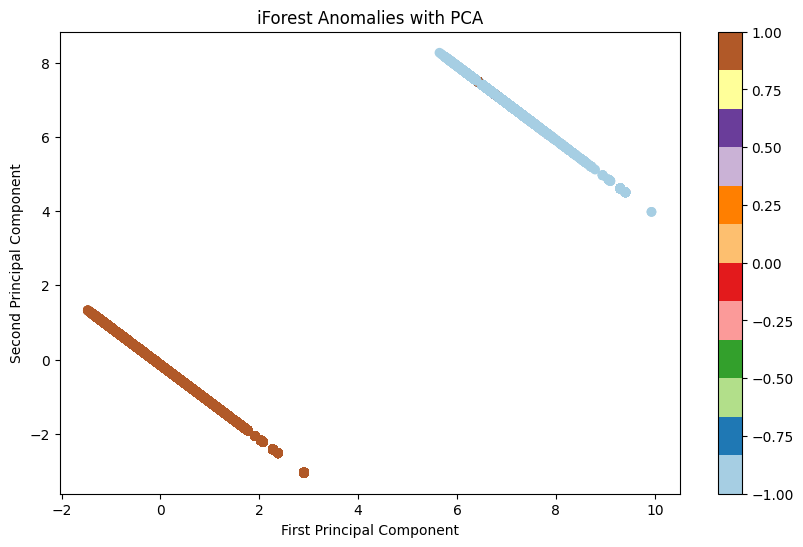

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_http_user['PCA1'], df_merged_http_user['PCA2'], c=df_merged_http_user['anomaly_iForest'], cmap='Paired')
plt.title('iForest Anomalies with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()


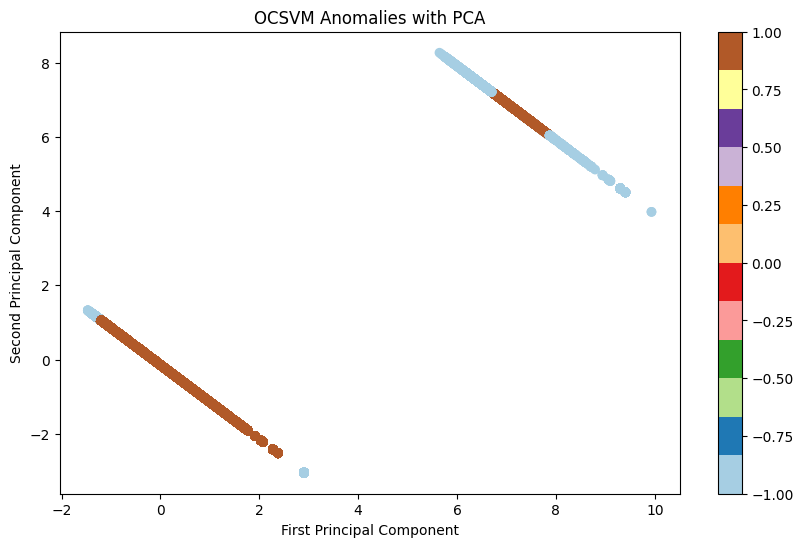

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_http_user['PCA1'], df_merged_http_user['PCA2'], c=df_merged_http_user['anomaly_OCSVM'], cmap='Paired')
plt.title('OCSVM Anomalies with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()


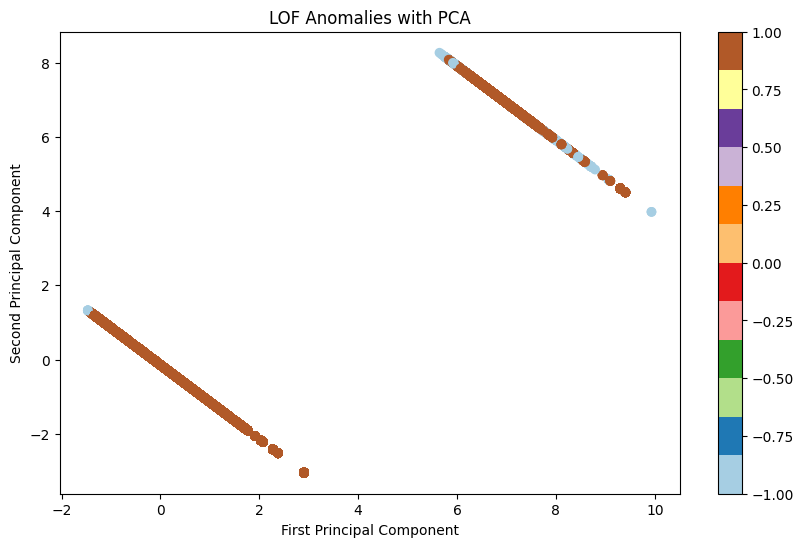

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_merged_http_user['PCA1'], df_merged_http_user['PCA2'], c=df_merged_http_user['anomaly_LOF'], cmap='Paired')
plt.title('LOF Anomalies with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()


In [ ]:
# Create a flag for common anomalies
df_merged_http_user['common_anomaly_flag'] = df_merged_http_user['user'].apply(lambda x: 1 if x in common_anomalies else 0)

# Filter the DataFrame to only include rows where 'common_anomaly_flag' is 1
common_anomalies_df = df_merged_http_user[df_merged_http_user['common_anomaly_flag'] == 1]

# Further investigation on these users
dropbox_users = common_anomalies_df[common_anomalies_df['url'].str.contains('dropbox', case=False)]
wikileaks_users = common_anomalies_df[common_anomalies_df['url'].str.contains('wikileaks', case=False)]
jobsearch_users = common_anomalies_df[common_anomalies_df['url'].str.contains('jobsearch', case=False)]
assange_users = common_anomalies_df[common_anomalies_df['url'].str.contains('assange', case=False)]

# Printing the number of records for each category
print(f"Number of common anomalies accessing Dropbox: {len(dropbox_users)}")
print(f"Number of common anomalies accessing Wikileaks: {len(wikileaks_users)}")
print(f"Number of common anomalies accessing jobsearch-related URLs: {len(jobsearch_users)}")
print(f"Number of common anomalies accessing URLs related to Assange: {len(assange_users)}")


Number of common anomalies accessing Dropbox: 159
Number of common anomalies accessing Wikileaks: 0
Number of common anomalies accessing jobsearch-related URLs: 0
Number of common anomalies accessing URLs related to Assange: 0


In [ ]:
# Update the keyword list to focus on specific categories of interest
selected_keywords = ["Dropbox", "Wikileaks", "Jobsearch", "Assange", "LinkedIn"]

# Filter the DataFrame to only include rows where the 'Category' column contains any of the selected keywords
filtered_df = df_merged_http_user[df_merged_http_user['Category'].apply(lambda x: any(keyword in x for keyword in selected_keywords))]

# Generate a new pie chart to visualize the distribution of the selected categories
plt.figure(figsize=(12, 8))
filtered_category_counts = filtered_df['Category'].value_counts()
plt.pie(filtered_category_counts, labels=filtered_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Data Leaks by Selected Categories")
plt.show()

filtered_category_counts


NameError: ignored